<a href="https://colab.research.google.com/github/AbdurRafiq/Medicare-Fraud-Detection-by-Data-Science/blob/master/Medicare_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot

In [2]:

data = pd.read_csv("/content/drive/My Drive/code/Medicare.csv")
data.head()

,npi,nppes_provider_gender,provider_type,hcpcs_code,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,FRAUD,Unnamed: 12
0,1003127655,M,Internal Medicine,99223,617.0,499,617,219.944716,332.463533,170.918590,160.501297,1.0,NaN
1,1003127655,M,Internal Medicine,99231,249.0,17,249,42.570080,69.899598,33.024418,30.899317,1.0,NaN
2,1003127655,M,Internal Medicine,99232,1220.0,235,1220,78.414213,120.000000,61.340197,57.327828,1.0,NaN
3,1003127655,M,Internal Medicine,99233,754.0,434,754,113.284987,172.590186,88.611313,83.092427,1.0,NaN
4,1003127655,M,Internal Medicine,99239,543.0,448,543,117.852320,188.176796,91.907495,85.472413,1.0,NaN


In [3]:
df= data.drop(['Unnamed: 12'], axis=1)

In [4]:
df.head(5)

,npi,nppes_provider_gender,provider_type,hcpcs_code,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,FRAUD
0,1003127655,M,Internal Medicine,99223,617.0,499,617,219.944716,332.463533,170.918590,160.501297,1.0
1,1003127655,M,Internal Medicine,99231,249.0,17,249,42.570080,69.899598,33.024418,30.899317,1.0
2,1003127655,M,Internal Medicine,99232,1220.0,235,1220,78.414213,120.000000,61.340197,57.327828,1.0
3,1003127655,M,Internal Medicine,99233,754.0,434,754,113.284987,172.590186,88.611313,83.092427,1.0
4,1003127655,M,Internal Medicine,99239,543.0,448,543,117.852320,188.176796,91.907495,85.472413,1.0


In [5]:
df.isnull().any()

npi                              False
nppes_provider_gender             True
provider_type                    False
hcpcs_code                       False
line_srvc_cnt                    False
bene_unique_cnt                  False
bene_day_srvc_cnt                False
average_Medicare_allowed_amt     False
average_submitted_chrg_amt       False
average_Medicare_payment_amt     False
average_Medicare_standard_amt    False
FRAUD                            False
dtype: bool

In [6]:
df["nppes_provider_gender"].fillna("M")

0        M
1        M
2        M
3        M
4        M
        ..
99995    M
99996    M
99997    M
99998    M
99999    M
Name: nppes_provider_gender, Length: 100000, dtype: object

In [7]:
df["nppes_provider_gender"].value_counts()


M    66257
F    29606
Name: nppes_provider_gender, dtype: int64

In [8]:
dfnew= df.drop(columns=["FRAUD"])
fraud = df["FRAUD"]

In [9]:
Xnew=pd.get_dummies(dfnew)

In [10]:
Xnew.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,nppes_provider_gender_F,nppes_provider_gender_M,provider_type_All Other Suppliers,provider_type_Allergy/ Immunology,provider_type_Ambulance Service Provider,provider_type_Ambulatory Surgical Center,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Audiologist,provider_type_Cardiac Surgery,provider_type_Cardiology,provider_type_Centralized Flu,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiac Electrophysiology,provider_type_Clinical Laboratory,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,...,hcpcs_code_J9310,hcpcs_code_J9355,hcpcs_code_J9395,hcpcs_code_J9999,hcpcs_code_P9603,hcpcs_code_P9604,hcpcs_code_P9612,hcpcs_code_P9615,hcpcs_code_Q0091,hcpcs_code_Q0092,hcpcs_code_Q0111,hcpcs_code_Q0112,hcpcs_code_Q0138,hcpcs_code_Q2035,hcpcs_code_Q2036,hcpcs_code_Q2037,hcpcs_code_Q2038,hcpcs_code_Q2039,hcpcs_code_Q3014,hcpcs_code_Q4010,hcpcs_code_Q4021,hcpcs_code_Q4022,hcpcs_code_Q4037,hcpcs_code_Q4038,hcpcs_code_Q4045,hcpcs_code_Q4049,hcpcs_code_Q4102,hcpcs_code_Q4131,hcpcs_code_Q4133,hcpcs_code_Q5101,hcpcs_code_Q5102,hcpcs_code_Q9956,hcpcs_code_Q9957,hcpcs_code_Q9958,hcpcs_code_Q9961,hcpcs_code_Q9965,hcpcs_code_Q9966,hcpcs_code_Q9967,hcpcs_code_R0070,hcpcs_code_R0075
0,1003127655,617.0,499,617,219.944716,332.463533,170.918590,160.501297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1003127655,249.0,17,249,42.570080,69.899598,33.024418,30.899317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1003127655,1220.0,235,1220,78.414213,120.000000,61.340197,57.327828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1003127655,754.0,434,754,113.284987,172.590186,88.611313,83.092427,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1003127655,543.0,448,543,117.852320,188.176796,91.907495,85.472413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
Xnew["Fraud"] = df["FRAUD"]

In [12]:
Xnew.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,nppes_provider_gender_F,nppes_provider_gender_M,provider_type_All Other Suppliers,provider_type_Allergy/ Immunology,provider_type_Ambulance Service Provider,provider_type_Ambulatory Surgical Center,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Audiologist,provider_type_Cardiac Surgery,provider_type_Cardiology,provider_type_Centralized Flu,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiac Electrophysiology,provider_type_Clinical Laboratory,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,...,hcpcs_code_J9355,hcpcs_code_J9395,hcpcs_code_J9999,hcpcs_code_P9603,hcpcs_code_P9604,hcpcs_code_P9612,hcpcs_code_P9615,hcpcs_code_Q0091,hcpcs_code_Q0092,hcpcs_code_Q0111,hcpcs_code_Q0112,hcpcs_code_Q0138,hcpcs_code_Q2035,hcpcs_code_Q2036,hcpcs_code_Q2037,hcpcs_code_Q2038,hcpcs_code_Q2039,hcpcs_code_Q3014,hcpcs_code_Q4010,hcpcs_code_Q4021,hcpcs_code_Q4022,hcpcs_code_Q4037,hcpcs_code_Q4038,hcpcs_code_Q4045,hcpcs_code_Q4049,hcpcs_code_Q4102,hcpcs_code_Q4131,hcpcs_code_Q4133,hcpcs_code_Q5101,hcpcs_code_Q5102,hcpcs_code_Q9956,hcpcs_code_Q9957,hcpcs_code_Q9958,hcpcs_code_Q9961,hcpcs_code_Q9965,hcpcs_code_Q9966,hcpcs_code_Q9967,hcpcs_code_R0070,hcpcs_code_R0075,Fraud
0,1003127655,617.0,499,617,219.944716,332.463533,170.918590,160.501297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,1003127655,249.0,17,249,42.570080,69.899598,33.024418,30.899317,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1003127655,1220.0,235,1220,78.414213,120.000000,61.340197,57.327828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,1003127655,754.0,434,754,113.284987,172.590186,88.611313,83.092427,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,1003127655,543.0,448,543,117.852320,188.176796,91.907495,85.472413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [13]:
X = Xnew.drop("Fraud",axis = 1)
y = Xnew["Fraud"]

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


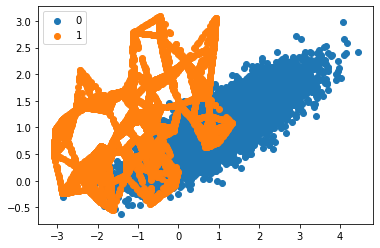

In [2]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.28)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we'll keep default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
X_train

array([[-0.53206792,  1.37521465],
       [-0.25458669,  1.01593735],
       [ 0.55740962,  0.7104949 ],
       ...,
       [ 1.09680704,  0.91828123],
       [-0.22591476,  2.10574369],
       [-1.97488839,  0.51038032]])

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14255, 2), (5545, 2), (14255,), (5545,))

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Setup random seed
np.random.seed(42)

In [10]:
# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test_scaled, y_test)

0.9493237150586114

In [11]:
clf.predict(X_test_scaled)

array([0, 0, 0, ..., 1, 0, 1])

In [12]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test_scaled)
np.mean(y_preds == y_test)

0.9493237150586114

In [15]:
from sklearn.metrics import classification_report
target_names = ['class 0 = NON','class 1 = FRAUD']
print(classification_report(y_test, y_preds,target_names=target_names))

                 precision    recall  f1-score   support

  class 0 = NON       0.95      0.94      0.95      2792
class 1 = FRAUD       0.94      0.95      0.95      2753

       accuracy                           0.95      5545
      macro avg       0.95      0.95      0.95      5545
   weighted avg       0.95      0.95      0.95      5545



[[2638  154]
 [ 127 2626]]


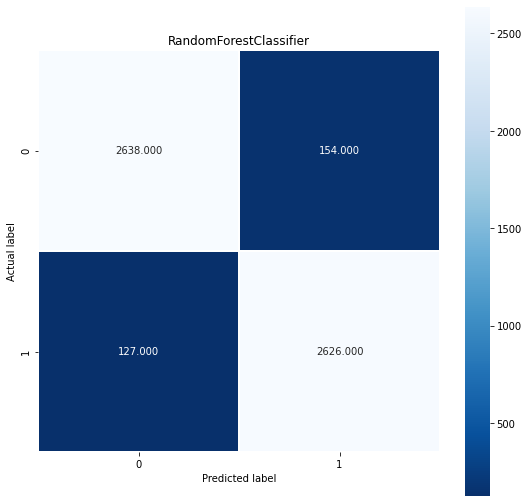

In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_preds)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("RandomForestClassifier");

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)
logisticRegr.score(X_test_scaled, y_test)

0.9049594229035167

In [20]:
y_preds = logisticRegr.predict(X_test_scaled)
np.mean(y_preds == y_test)

0.9049594229035167

In [21]:
from sklearn.metrics import classification_report
target_names = ['class 0 = Green','class 1 = Red']
print(classification_report(y_test, y_preds,target_names=target_names))

                 precision    recall  f1-score   support

class 0 = Green       0.90      0.91      0.91      2792
  class 1 = Red       0.91      0.90      0.90      2753

       accuracy                           0.90      5545
      macro avg       0.91      0.90      0.90      5545
   weighted avg       0.91      0.90      0.90      5545



[[2551  241]
 [ 286 2467]]


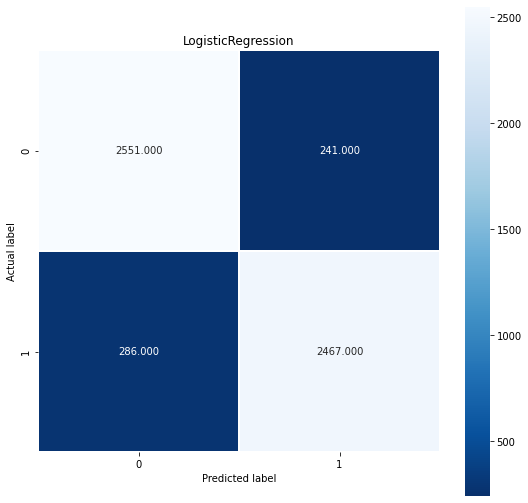

In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_preds)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("LogisticRegression");

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_preds)

0.9048976396679007